In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import nose.tools
# Write your imports here

# Data Visualization and Exploratory Data Analysis Lab
## Visualizing and exploring data. Data mining process as a whole

### Problem 1. Read the dataset (1 point)
You'll be exploring data about people's income. Your task is to understand whether there are significant differences in the lifestyle of lower- vs. higher-income groups.

Read the dataset located [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data). The information file is [here](https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.names). Save it into the variable `income_data`. Change the column names to what you like. The last column is related to the income class.

Get acquainted with the information file well before starting work.

You don't need to clean the dataset.

In [3]:
income_data = pd.read_csv("data/adult.data", header=None, delimiter=",[\s]+",engine='python')

In [4]:
income_data.columns = ["age", "workclass", "fnlwgt", "education", "education_num", "marital_status", "occupation", "relationship", "race", "sex", "capital_gain", "capital_loss", "hours_per_week", "native_country", "income"]

In [5]:
income_data.sample(n=100)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
12226,57,Self-emp-not-inc,123778,HS-grad,9,Married-civ-spouse,Sales,Husband,White,Male,0,0,48,United-States,<=50K
28876,41,Private,113324,HS-grad,9,Married-civ-spouse,Handlers-cleaners,Husband,White,Male,0,0,40,United-States,<=50K
10977,50,Self-emp-not-inc,167380,7th-8th,4,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,40,United-States,<=50K
11294,73,?,89852,1st-4th,2,Married-civ-spouse,?,Husband,White,Male,0,0,40,Portugal,<=50K
18438,31,Private,217962,Some-college,10,Never-married,Protective-serv,Other-relative,Black,Male,0,0,40,?,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,31,Private,220066,Bachelors,13,Never-married,Exec-managerial,Not-in-family,White,Female,14344,0,50,United-States,>50K
6384,35,Private,38948,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,>50K
1913,39,Private,324420,1st-4th,2,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,45,Mexico,<=50K
3827,23,Private,27776,Some-college,10,Married-civ-spouse,Transport-moving,Husband,White,Male,0,0,24,United-States,<=50K


In [6]:
nose.tools.assert_is_not_none(income_data)

### Problem 2. High income (1 point)
How many people have high income (over 50 000 USD per year)? Write a function to return the value. The function should accept the dataframe as a parameter. Work with that parameter.

In [7]:
def get_num_people_with_high_income(dataframe):
    return sum(dataframe.income == ">50K")

In [8]:
people_with_high_income_count = get_num_people_with_high_income(income_data)
people_with_high_income_count

7841

In [9]:
# This cell contains hidden tests

### Problem 3. Capital gain: thresholding (1 point)
Plot a histogram of the capital gain. You can see that there are many people with relatively low gains and a few people - with very high gains.

(array([3.0913e+04, 8.7800e+02, 1.5700e+02, 3.6000e+02, 3.8000e+01,
        4.9000e+01, 5.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.5900e+02]),
 array([    0.  ,  4999.95,  9999.9 , 14999.85, 19999.8 , 24999.75,
        29999.7 , 34999.65, 39999.6 , 44999.55, 49999.5 , 54999.45,
        59999.4 , 64999.35, 69999.3 , 74999.25, 79999.2 , 84999.15,
        89999.1 , 94999.05, 99999.  ]),
 <a list of 20 Patch objects>)

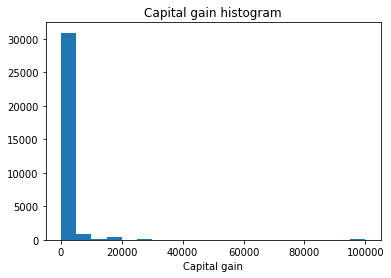

In [40]:
plt.title("Capital gain histogram")
plt.xlabel("Capital gain")
plt.hist(income_data.capital_gain)

Write a function which accepts a dataframe and a capital gain value (in USD) and returns how many people are there with **greater than or equal to** that threshold gain.

In [11]:
def get_num_people_with_higher_gain(income_data, threshold_gain):
    return sum(income_data.capital_gain >= threshold_gain)

In [12]:
nose.tools.assert_equal(get_num_people_with_higher_gain(income_data, 60000), 159)

Create a pie chart of the number of people by marital status.

In [13]:
income_data.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education_num      int64
marital_status    object
occupation        object
relationship      object
race              object
sex               object
capital_gain       int64
capital_loss       int64
hours_per_week     int64
native_country    object
income            object
dtype: object

In [14]:
income_data.marital_status.unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [15]:
marital_status_group = income_data.groupby("marital_status").size()

In [16]:
marital_status_group.values

array([ 4443,    23, 14976,   418, 10683,  1025,   993], dtype=int64)

In [17]:

marital_status_group.index

Index(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype='object', name='marital_status')

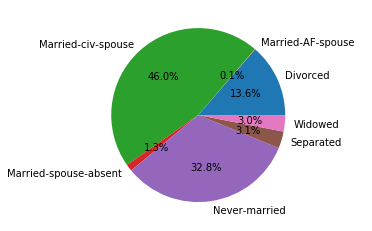

In [18]:
plt.gca().axis('equal')
plt.pie(marital_status_group.values, labels=marital_status_group.index, autopct="%1.1f%%")
plt.show()

### Problem 4. Marital status (2 points)
Which type of marital status is the most prominent (i.e. has the most people)? How many are there? Write a function that **calculates and returns the two answers**. 

In [19]:
def most_prominent_marital_status(dataframe):
    marital_status_group = dataframe.groupby("marital_status").size()
    status = marital_status_group.idxmax()
    num_people = marital_status_group.max()
    return (status, num_people)

In [20]:
(status, num_people) = most_prominent_marital_status(income_data)
nose.tools.assert_not_equal(status, "")
nose.tools.assert_greater(num_people, 10000)

### Problem 5. Age groups (1 point)
Create a histogram of all people's ages. Use the default settings. Add the label "Age" on the x-axis and "Count" on the y-axis.

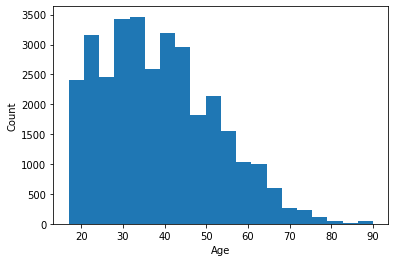

In [41]:
plt.xlabel("Age")
plt.ylabel("Count")
plt.hist(income_data.age)
plt.show()

Let's get another view of the data. Split the ages into three:
1. Young people: $\text{age} \le 30$
2. Middle-aged people: $30 < \text{age} \le 60$
3. Old people: $60 < \text{age}$

Return the counts in the following function. Which age group has the most people? How many are there?

In [22]:
def get_num_people_by_age_category(dataframe):
    young = len(dataframe[dataframe.age <= 30])
    middle_aged = len(dataframe[(dataframe.age > 30) & (dataframe.age <=60)])
    old = len(dataframe[(dataframe.age > 60)])    
    return young, middle_aged, old

In [23]:
young, middle_aged, old = get_num_people_by_age_category(income_data)
nose.tools.assert_greater(young, 0)
nose.tools.assert_greater(middle_aged, 0)
nose.tools.assert_greater(old, 0)

Now we can create a bar chart. Execute the code below to see it.

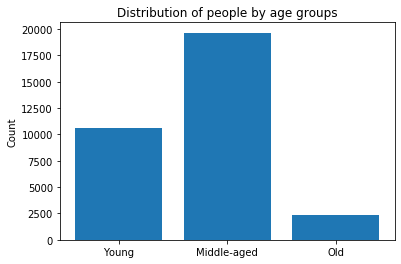

In [24]:
plt.title("Distribution of people by age groups")
plt.bar(range(3), [young, middle_aged, old])
plt.xticks(range(3), ["Young", "Middle-aged", "Old"])
plt.ylabel("Count")
plt.show()

### Problem 6. Native country (2 points)
Have a look at the native country of the people. The highest number of people are, as expected, from the US. What country makes for **the second highest** number of people? How many are they? Write a function to **calculate** and return the answer given a dataframe. DO NOT hardcode the answer, e.g. `return "Germany"`.

In [25]:
def get_second_highest_num_people(dataframe):
    native_country_group = dataframe.groupby("native_country").size().sort_values(ascending=False)
    num_people = native_country_group.values[1]
    country = native_country_group.index[1]    
    return num_people, country

In [26]:
get_second_highest_num_people(income_data)

(643, 'Mexico')

In [27]:
num_people, country = get_second_highest_num_people(income_data)
nose.tools.assert_greater(num_people, 0)
nose.tools.assert_not_equal(country, "")

### Problem 7. Busiest occupations (2 points)
Which people are most overworked? Group all data by occupation and calculate the mean hours per week for each group.

Write a function that **calculates and returns** all mean hours per week as a `Series`. Sort the results in descending order (most hours to fewest hours).

In [28]:
def get_mean_working_hours_by_income(dataframe):
    busiest_occupations = dataframe.groupby("occupation")["hours_per_week"].mean()
    return busiest_occupations[busiest_occupations.index != "?"].sort_values(ascending=False)

In [29]:
busiest_occupations = income_data.groupby("occupation")["hours_per_week"].mean()


In [30]:
busiest_occupations = busiest_occupations[busiest_occupations.index != "?"]

In [31]:
busiest_occupations

occupation
Adm-clerical         37.558355
Armed-Forces         40.666667
Craft-repair         42.304221
Exec-managerial      44.987703
Farming-fishing      46.989940
Handlers-cleaners    37.947445
Machine-op-inspct    40.755744
Other-service        34.701669
Priv-house-serv      32.885906
Prof-specialty       42.386715
Protective-serv      42.870570
Sales                40.781096
Tech-support         39.432112
Transport-moving     44.656230
Name: hours_per_week, dtype: float64

In [32]:
hours = get_mean_working_hours_by_income(income_data)
print(hours)
nose.tools.assert_almost_equal(hours["Handlers-cleaners"], 37.95, delta = 0.01)

occupation
Farming-fishing      46.989940
Exec-managerial      44.987703
Transport-moving     44.656230
Protective-serv      42.870570
Prof-specialty       42.386715
Craft-repair         42.304221
Sales                40.781096
Machine-op-inspct    40.755744
Armed-Forces         40.666667
Tech-support         39.432112
Handlers-cleaners    37.947445
Adm-clerical         37.558355
Other-service        34.701669
Priv-house-serv      32.885906
Name: hours_per_week, dtype: float64


Finally, let's plot a bar chart. Check the values carefully. If your do not match, feel free to edit the chart generation code below.

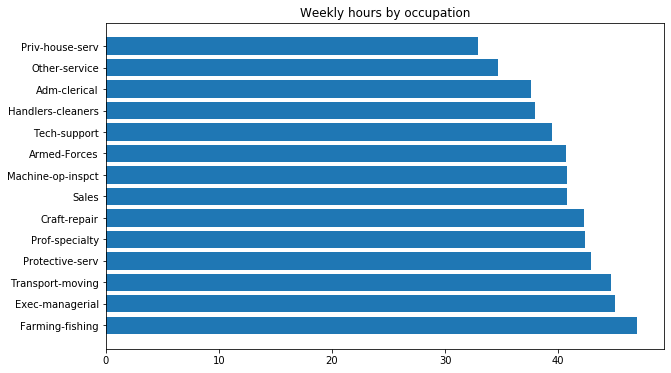

In [33]:
plt.figure(figsize = (10, 6))
plt.title("Weekly hours by occupation")
plt.barh(range(len(hours)), hours)
plt.yticks(list(range(len(hours))), hours.index)
plt.show()

In [48]:
nuclear = pd.read_csv("https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/boot/nuclear.csv")

In [49]:
nuclear.head()

,Unnamed: 0,cost,date,t1,t2,cap,pr,ne,ct,bw,cum.n,pt
0,1,460.05,68.58,14,46,687,0,1,0,0,14,0
1,2,452.99,67.33,10,73,1065,0,0,1,0,1,0
2,3,443.22,67.33,10,85,1065,1,0,1,0,1,0
3,4,652.32,68.00,11,67,1065,0,1,1,0,12,0
4,5,642.23,68.00,11,78,1065,1,1,1,0,12,0


In [50]:
nuclear.cost.mean()

461.5603124999999

In [54]:
sum(nuclear["ne"])

8

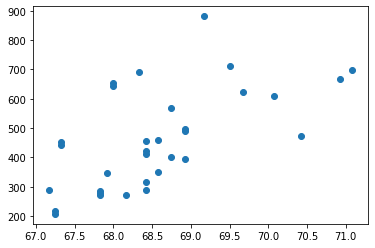

In [57]:
plt.scatter(nuclear.date, nuclear.cost)
plt.show()

In [60]:
nuclear[nuclear["pr"] == 1]["cap"]

2     1065
4     1065
8      822
17     530
19    1050
21     828
23     821
29     886
30     745
31     886
Name: cap, dtype: int64